In [44]:
using Distributions
using Expectations

In [55]:
𝑁 = Normal()
Eₙ = expectation(𝑁)
Eₙ(x -> x)

-4.052286867506662e-18

In [56]:
expectation(x->x^2, 𝑁)

0.9999999999999988

In [48]:
using LinearAlgebra

In [109]:
x = nodes(Eₙ)
p(x) = x^2
Eₙ * p.(x) == p.(x) ⋅ weights(Eₙ)

true

In [110]:
dₓ = MixtureModel([Uniform(), Normal(), Gamma()]);
Eₓ = expectation(dₓ);
Eₓ(x -> x) # 0.5000000000000016

0.5000000000000014

In [111]:
2Eₓ(x -> x) # 1.000000000000003

1.0000000000000029

In [112]:
weights(Eₓ) # [1/3, 1/3, 1/3]

3-element Vector{Float64}:
 0.3333333333333333
 0.3333333333333333
 0.3333333333333333

In [113]:
expectations(Eₓ) # component expectations

3-element Vector{IterableExpectation{Vector{Float64}, Vector{Float64}}}:
 IterableExpectation{Vector{Float64}, Vector{Float64}}([0.001553257962675192, 0.008165938360126412, 0.019989067515846226, 0.036899976285362845, 0.05871973210397369, 0.08521711880861582, 0.11611128394758691, 0.15107475260334208, 0.18973690850537855, 0.23168792592899007  …  0.7683120740710099, 0.8102630914946214, 0.848925247396658, 0.8838887160524131, 0.9147828811913842, 0.9412802678960264, 0.9631000237146372, 0.9800109324841537, 0.9918340616398735, 0.9984467420373249], [0.003984096248083259, 0.009233234155545427, 0.014392353941661636, 0.01939959628481351, 0.024201336415297037, 0.028746578108809543, 0.03298711494109026, 0.036877987368852574, 0.040377947614710114, 0.04344989360054148  …  0.04344989360054148, 0.040377947614710114, 0.036877987368852574, 0.03298711494109026, 0.028746578108809543, 0.024201336415297037, 0.01939959628481351, 0.014392353941661636, 0.009233234155545427, 0.003984096248083259])
 IterableExpect

In [114]:
𝑈 = Uniform()
Eᵤ = expectation(𝑈)
Eᵤ(x -> x)

0.49999999999999994

# References
- [ ] [Expectation operators for Distributions.jl objects](https://github.com/QuantEcon/Expectations.jl)

In [148]:
using Expectations

# Example: Rolling a fair six-sided die
xs = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
pmf = fill(1/6, 6)  # Assuming a fair die

# Define the distribution
d = DiscreteNonParametric(sort(xs), pmf)

@show typeof(xs), typeof(ps);

(typeof(xs), typeof(ps)) = (Vector{Float64}, Vector{Float64})


In [143]:
mean(d) == sum(xs .* pmf)

true

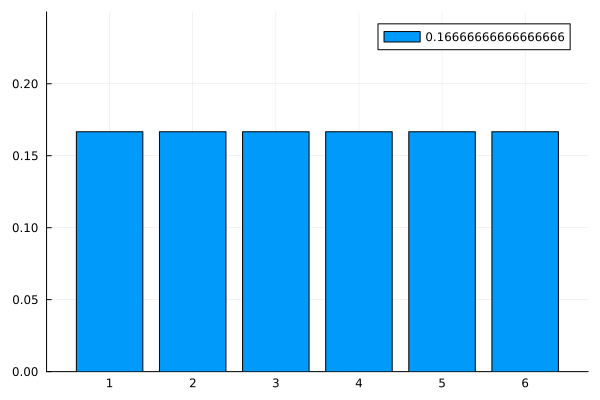

In [160]:
bar(pmf, ylims=(0.0, .25), label="$(pmf[1])")

In [129]:
Eλ = expectation(truncated(Exponential(),0.0,1000.0))

IterableExpectation{Vector{Float64}, Vector{Float64}}([0.005771623893508604, 0.030410092731472105, 0.07473557039969592, 0.13875615602756852, 0.22247053322763577, 0.3258756917067558, 0.4489676533222564, 0.591741607526103, 0.7541919475071381, 0.9363122823681351  …  999.0636877176319, 999.2458080524929, 999.408258392474, 999.5510323466777, 999.6741243082932, 999.7775294667724, 999.8612438439725, 999.9252644296002, 999.9695899072685, 999.9942283761065], [0.014726580204699784, 0.033445822963946915, 0.05027195282874849, 0.0642975826744261, 0.07489867754592283, 0.08175409021803386, 0.08484989947659768, 0.08445042381988148, 0.08104192823044161, 0.07525921125496864  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [130]:
Eλ(x -> x)

0.9999999999999939

In [131]:
# Creating original samples...
N = Normal(0,1)
obs = rand(N,10000);


In [132]:
# Cdf..
myCdf = ecdf(obs)
cdf_obs = map(x -> myCdf(x), sort(obs));
# Cdf --> Pmf..
pmf_obs = Float64[]
for i in 1:length(obs)
    if i == 1 
        append!(pmf_obs,cdf_obs[1])
    else
        append!(pmf_obs,cdf_obs[i]-cdf_obs[i-1])
    end
end 

In [133]:
# Creating a full distribution object..
d = DiscreteNonParametric(sort(obs),pmf_obs)
@show typeof(obs)

typeof(obs) = Vector{Float64}


Vector{Float64} (alias for Array{Float64, 1})

In [134]:
# Sampling from the distribution object..
out = rand(d,100)
# Test it...
plot(sort(out))
quantile(d,0.5)
quantile(d,1-0.025)
cdf(d,0)

0.5005